In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
class config:
    ex1 = r'data\train\ex_1.csv'
    ex9 = r'data\train\ex_9.csv'
    ex20 = r'data\train\ex_20.csv'
    ex_21 = r'data\train\ex_21.csv'
    ex_23 = r'data\train\ex_23.csv'
    ex_24 = r'data\train\ex_24.csv'
    test_ex_4 = r'data\test\ex_4.csv'
    test_ex_22 = r'data\test\ex_22.csv'

In [3]:
# load data and concatenate
ex1 = pd.read_csv(config.ex1)
ex9 = pd.read_csv(config.ex9)
ex20 = pd.read_csv(config.ex20)
ex_21 = pd.read_csv(config.ex_21)
ex_23 = pd.read_csv(config.ex_23)
ex_24 = pd.read_csv(config.ex_24)
test_ex_4 = pd.read_csv(config.test_ex_4)
test_ex_22 = pd.read_csv(config.test_ex_22)

train = pd.concat([ex1, ex9, ex20, ex_21, ex_23, ex_24], axis=0)
train.sort_index(inplace=True)
test = pd.concat([test_ex_4, test_ex_22], axis=0)
test.sort_index(inplace=True)

In [4]:
train_batches = [ex1, ex9, ex20, ex_21, ex_23, ex_24]
test_batches = [test_ex_4, test_ex_22]

In [5]:
train.head()

,time,input_voltage,el_power
0,810.07028,10.000,1228.791720
0,811.04000,3.000,1217.413110
0,818.84000,3.445,1253.790314
0,810.00000,3.000,1102.949693
0,849.22000,3.000,1238.511285


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52940 entries, 0 to 11818
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           52940 non-null  float64
 1   input_voltage  52940 non-null  float64
 2   el_power       52940 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [7]:
train.describe()

,time,input_voltage,el_power
count,52940.000000,52940.000000,52940.000000
mean,5606.444209,5.505534,1843.315949
std,2960.330233,2.549721,723.126377
min,810.000000,3.000000,932.837260
25%,3086.930000,3.000000,1205.743900
50%,5431.033890,4.842105,1605.753998
75%,7782.301370,7.421053,2399.419112
max,12636.840000,10.000000,3249.891217


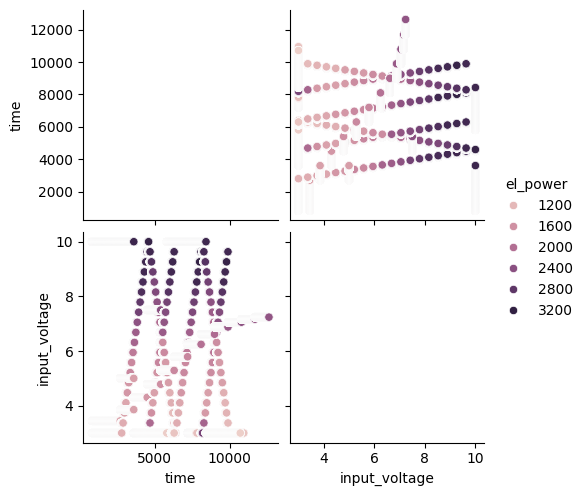

In [8]:
sns.axes_style('whitegrid')

sns.pairplot(train, hue='el_power')

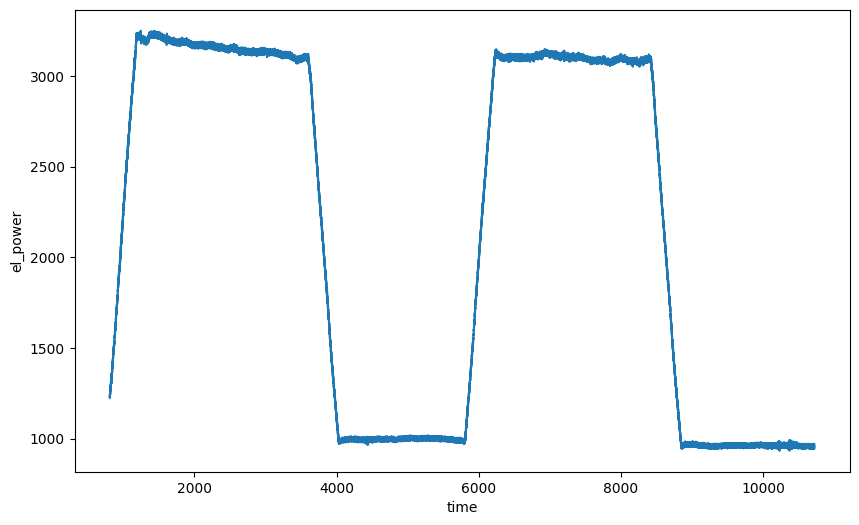

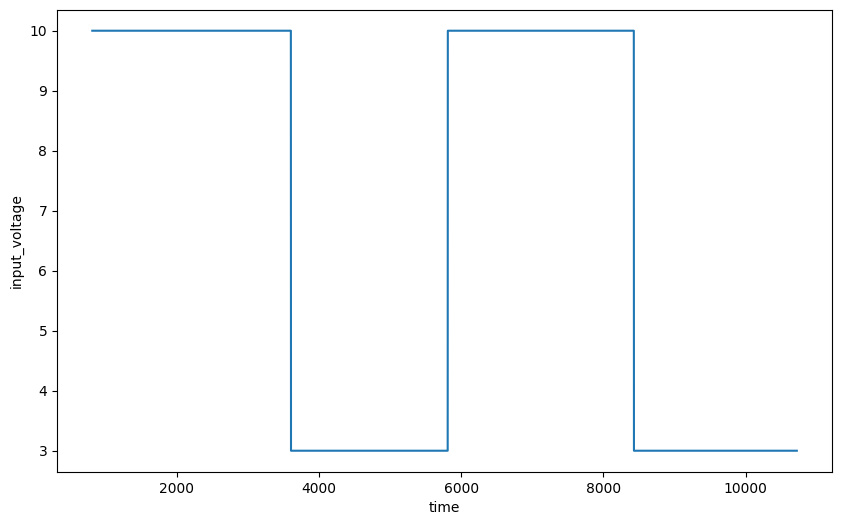

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='el_power', data=ex1)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='input_voltage', data=ex1)
plt.show()

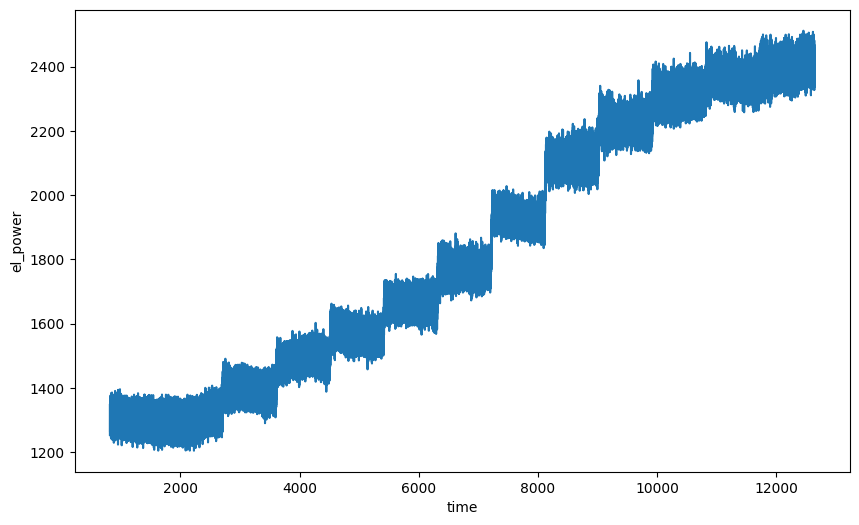

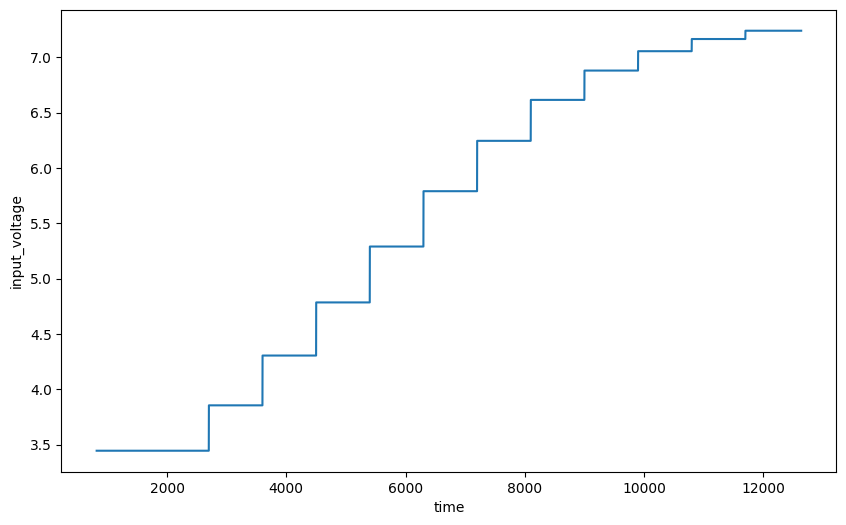

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='el_power', data=ex9)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='input_voltage', data=ex9)
plt.show()

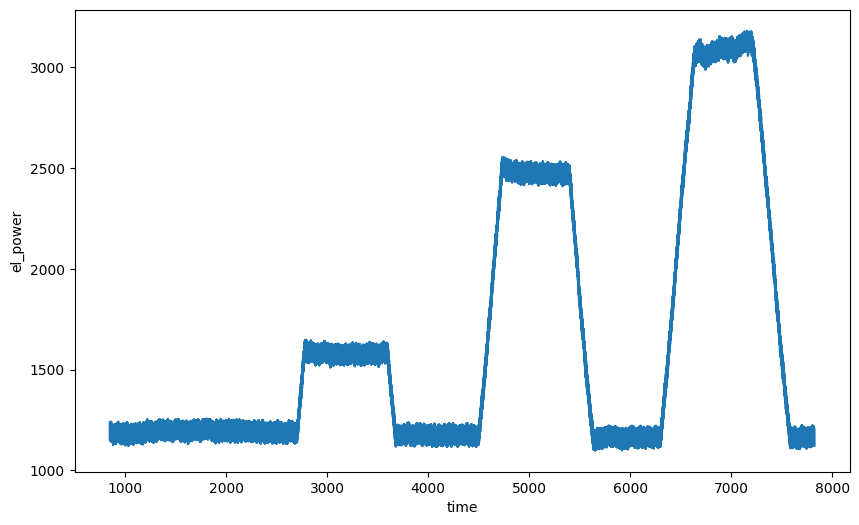

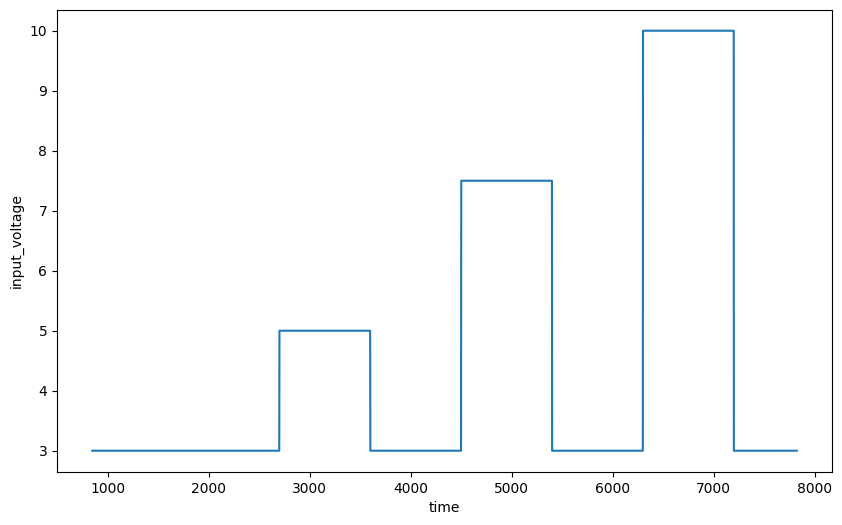

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='el_power', data=ex20)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='input_voltage', data=ex20)
plt.show()

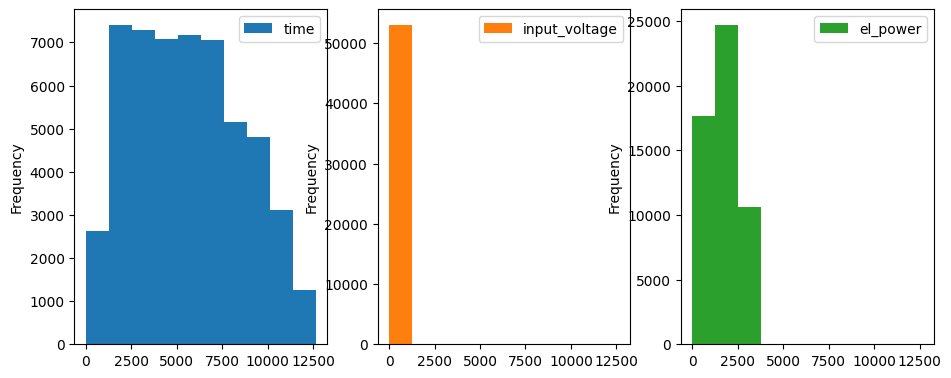

In [12]:
train.plot(kind='hist', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,20))
plt.show()

time                Axes(0.125,0.712609;0.168478x0.167391)
input_voltage    Axes(0.327174,0.712609;0.168478x0.167391)
el_power         Axes(0.529348,0.712609;0.168478x0.167391)
dtype: object

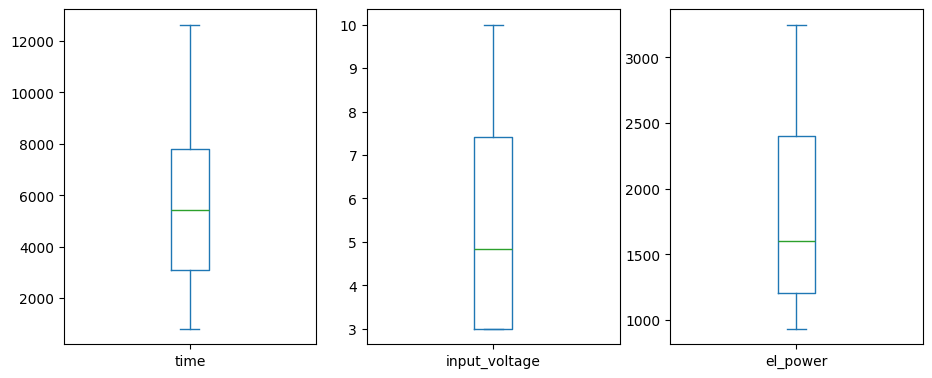

In [13]:
train.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,20))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

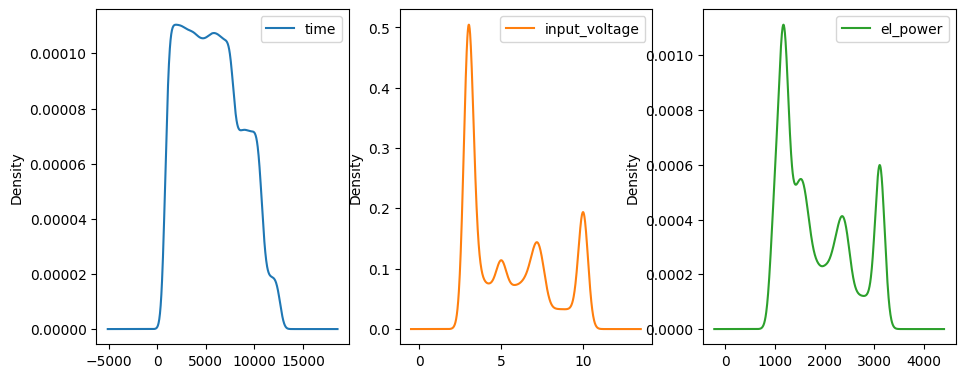

In [14]:
train.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,20))

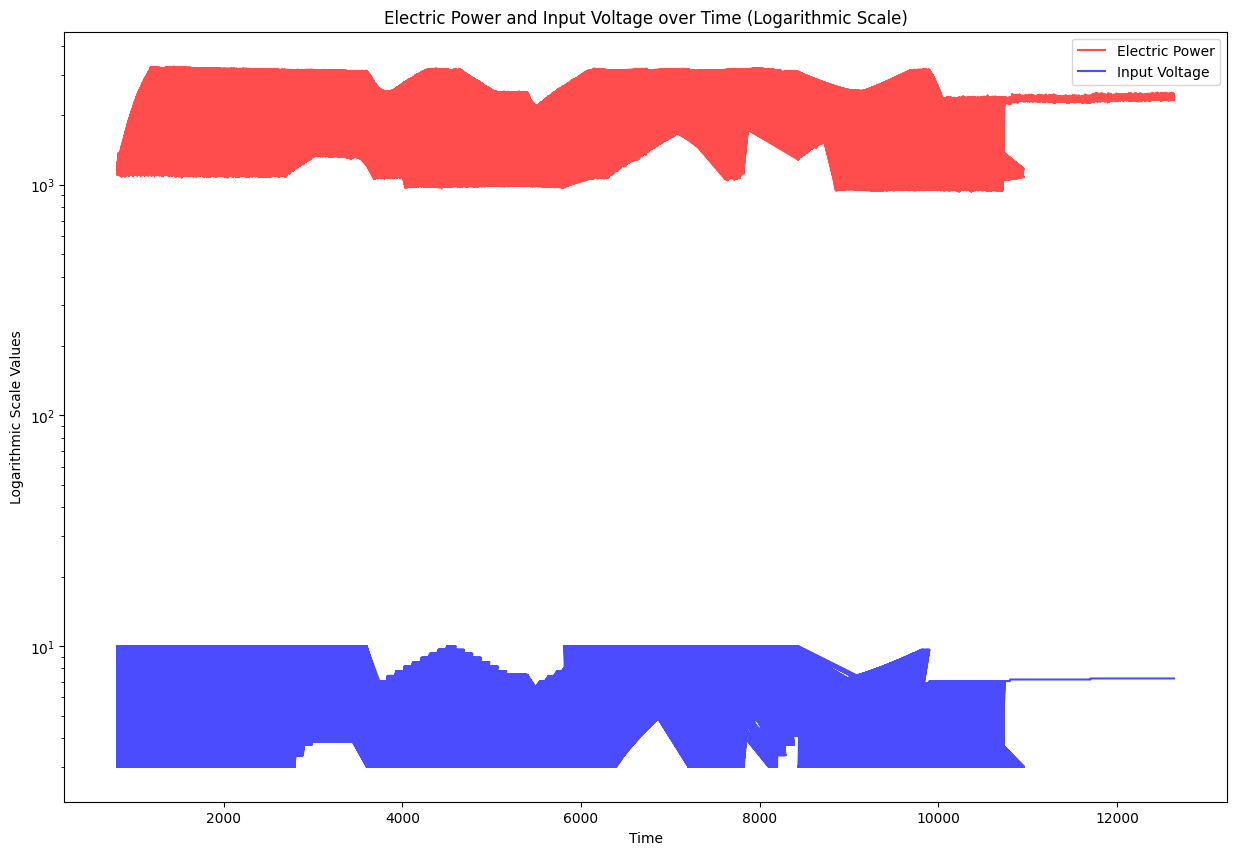

In [15]:
# Make sure the 'time' column is set as the index
temp = train.copy()
temp.set_index('time', inplace=True)

# Plot both 'el_power' and 'input_voltage'
plt.figure(figsize=(15, 10))
plt.plot(temp['el_power'], label='Electric Power', color='r', alpha=0.7)
plt.plot(temp['input_voltage'], label='Input Voltage', color='b', alpha=0.7)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Logarithmic Scale Values')
plt.title('Electric Power and Input Voltage over Time (Logarithmic Scale)')
plt.legend()

# Show the plot
plt.show()

<Axes: >

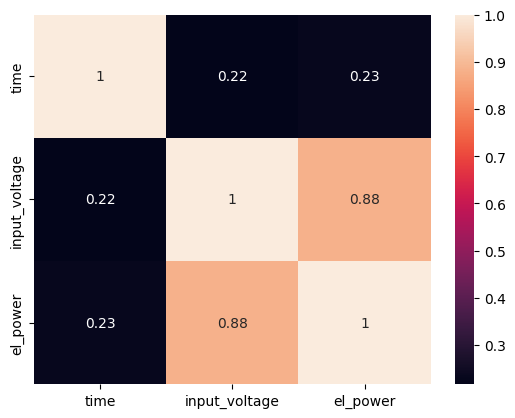

In [16]:
sns.heatmap(train.corr(), annot=True)

In [17]:
# Create lagged features

def create_lagged_features(df, lag=1):
    for i in range(lag):
        df[f'input_voltage_lag_{i+1}'] = df['input_voltage'].shift(i+1)
    return df

In [18]:
train = create_lagged_features(train, lag=1)
train.dropna(inplace=True)
test = create_lagged_features(test, lag=1)
test.dropna(inplace=True)

In [19]:
test_features = test.drop('el_power', axis=1)
test_target_true = test['el_power']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

X = train.drop(['el_power'], axis=1).copy()
y = train['el_power'].copy()

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale the features and target

# feature scaling
scaler_X = MinMaxScaler()
train_X = scaler_X.fit_transform(train_X)
val_X = scaler_X.transform(val_X)
test_features = scaler_X.transform(test_features) # test features

# target scaling
scaler_y = MinMaxScaler()
train_y = scaler_y.fit_transform(train_y.values.reshape(-1, 1))
val_y = scaler_y.transform(val_y.values.reshape(-1, 1))
test_target = scaler_y.transform(test_target_true.values.reshape(-1, 1)) # test target

In [22]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Initialize the base regressors

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

lgbm = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=4,
    random_state=42,
    objective='regression_l2',
    max_depth=10,
    metric='rmse',
    verbose=-1
)

catboost = CatBoostRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

# Initialize the StackingRegressor


stack = StackingRegressor(
    estimators=[('XGBoost', xgb), ('LightGBM', lgbm), ('CatBoost', catboost)],
    final_estimator=LinearRegression(),
    n_jobs=4
)

# Fit the model

stack.fit(train_X, train_y)

c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=4,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('LightGBM',
                               LGBMRegressor(learning_rate=0.05, max_depth=10,
                                             metric='rmse', n_estimators=1000,
                                             n_jobs=4,
                                             objective='regression_l2',
                                             random_state=42, verbose=-1)),
                              ('CatBoost',
                               <catboost.core.CatBoostRegressor object at 0x000001AEABEE30E0>)],
                  final_estimator=LinearRegression(), n_jobs=4)

In [23]:
cvs = -cross_val_score(stack, train_X, train_y, cv=5, scoring='neg_root_mean_squared_error').mean()

print(f'Cross-Validation Score RMSE : {cvs}')

c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_stacking.py:970: D

Cross-Validation Score RMSE : 0.05781391758789874


In [24]:
# prediction on test data
test_pred = stack.predict(test_features)
# inverse transform the scaled target
test_pred = scaler_y.inverse_transform(test_pred.reshape(-1, 1))

# check the mean squared error with the true target
print('MSE:', mean_squared_error(test_target_true, test_pred))
print('RMSE:', np.sqrt(mean_squared_error(test_target_true, test_pred)))

MSE: 262410.2361371519
RMSE: 512.2599302474788
